# [ERG-190C] Homework 4: Data Visualization

So far we have learned how to use numpy and pandas to manipulate and explore datasets. Now, we are going to learn how to use Python libraries matplotlib and seaborn to explore datasets visually.
In this homework, we will explore:
+ How to plot and customize graphs with matplotlib and seaborn
+ How to visualize distributions with histograms, kernel density estimators, box-and-whisker plots, and violin plots, and how to determine when to use which type of plot
+ How to create basic scatter plots
+ Analyze and interpret plots
+ How to apply best practices when creating visualizations, including labeling titles, axes, legends, adjusting the font size, and choosing a color palette

## Table of Contents
1 - [Plotting Basics](#section basics)<br>
2 - [The Data](#section 1)<br>
3 - [Visual EDA - Histograms, KDEs, Box Plots, Violin Plots](#section 2)<br>
4 - [Scatter Plots](#section 3)<br>

**Dependencies:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

<u>Reminder</u>: whenever you plot a graph for a lab or hw assignment, always include the basic elements of a graph: axis labels, title, legend (if necessary), etc.


----

## Section 1: Plotting Basics <a id='section basics'></a>

Before we work with the data, we are going to go over some basic plotting basics using trig functions. Take a look at the sample code below that plots a sine wave.

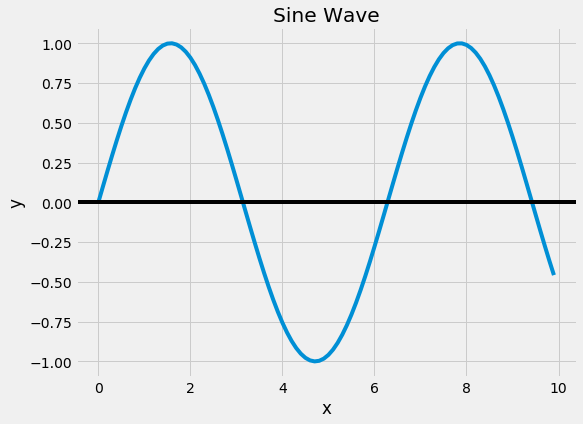

In [3]:
# Sample code to plot a sine wave
x = np.arange(0, 10, 0.1) # This generates a set of numbers to plug into the sine function
y = np.sin(x) # Outputs y values from the sine function
plt.figure(figsize=(8,6)) #a
plt.plot(x, y) #b
plt.title("Sine Wave") #c
plt.xlabel("x") #d
plt.ylabel("y") #e
plt.axhline(y=0, color="k") #f
plt.grid(True, which='both') #g
plt.show()

**Question 1.1:** Certain lines of codes are denoted by a comment, like "#1a". Label what each commented line does, replacing the '...'. Feel free to modify the sample code to see what changes. You can also look up matplotlib.pyplot documentation [here](https://matplotlib.org/api/pyplot_summary.html): <br>
**a.** ... <br>
**b.** ... <br>
**c.** ... <br>
**d.** ... <br>
**e.** ... <br>
**f.** ... <br>
**g.** ... <br>

In [4]:
# POSSIBLE SOLUTION
# 1a. Changes plot size
# 1b. Plots y vs. x as lines (by default)
# 1c. Adds a title to the plot
# 1d. Labels the x-axis
# 1e. Labels the y-axis
# 1f. Draws the a horizontal line on the x-axis
# 1g. Turns axis grids on

Next, run and observe the code below.

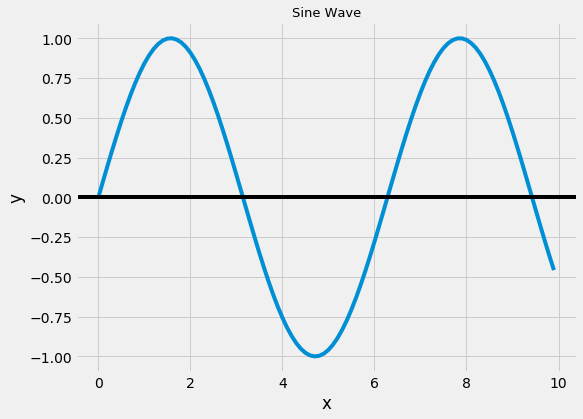

In [5]:
x = np.arange(0, 10, 0.1)
y = np.sin(x) 
plt.figure(figsize=(8,6))
plt.plot(x, y) 
plt.title("Sine Wave", fontsize=13) 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 
plt.show()

**Question 1.2:** There is one difference between this plot and the first one. What is the difference, and where in the code produces it? Which plot is better?

Answer: ...

In [6]:
# POSSIBLE SOLUTION
# The title is much smaller. In the code, plt.title() contains an additional argument, fontsize=13
# which makes the title smaller, even smaller than the axes labels. 
# The original plot is better because the title should be bigger than te axes labels.

**Question 1.3:** In some cases, it would be better to create multiple subplots at once rather than in succession, especially if we want to compare the graphs side-bye-side. Take a look at the code below. Change the ellipses so that a sine wave, a cosine wave, and a tangent wave are created. Remember to change the titles!

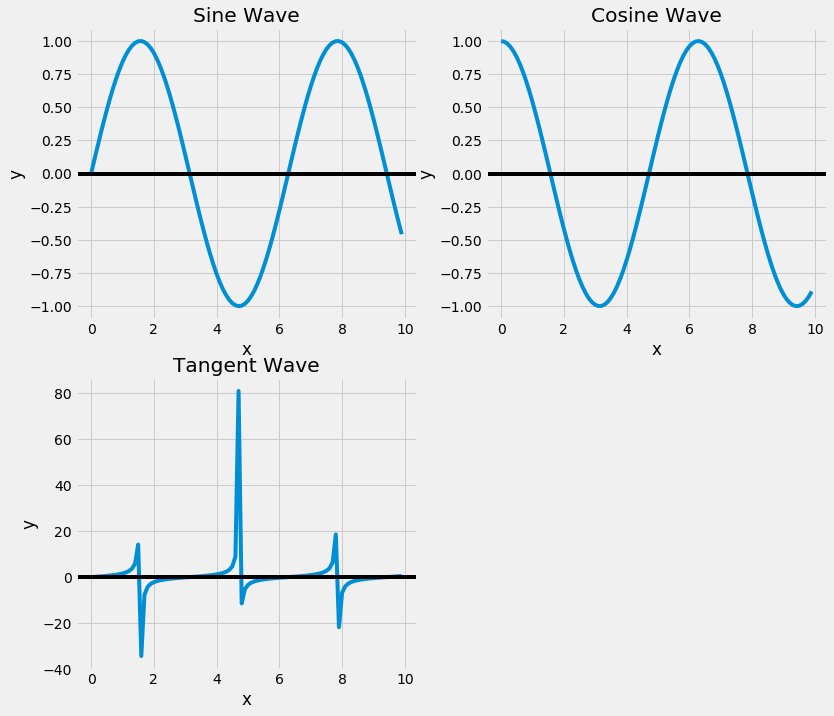

In [7]:
# SOLUTION
plt.figure(figsize=(12, 11))
plt.subplot(2, 2, 1)

x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y) 
plt.title("Sine Wave") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 

plt.subplot(2, 2, 2)

x = np.arange(0, 10, 0.1)
y = np.cos(x)
plt.plot(x, y) 
plt.title("Cosine Wave") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 

plt.subplot(2, 2, 3)

x = np.arange(0, 10, 0.1)
y = np.tan(x)
plt.plot(x, y) 
plt.title("Tangent Wave") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k") 
plt.grid(True, which='both') 

plt.show()

<br>

----
## Section 2: The Data<a id='section 1'></a>

In this notebook, you'll be working with data from the World Bank on electricity access, electricity consumption, and total energy consumption for different countries and regions around the world. 

Feel free to visit the links below to play around with the visualizations on the World Bank website: <br>
- [Electricity access data](https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS):  <br>
This table gives the percentage of the population that has access to electricity from years 1990 to 2014 for each country. <br>
- [Electricity consumption data](https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC): <br>
This table gives the electric power consumption (kWh per capita) from years 1990 to 2014 for each country. Note that some countries' data are missing. <br>
- [Total energy consumption data](https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE): <br>
This table gives the total energy use (kg of oil equivalent per capita) from years 1990 to 2014 for each country. Note that some countries' data are missing.

In [8]:
# Read in Electricity Access data
access = pd.read_csv("data/access.csv")
access.head()

,Country Name,Country Code_x,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,Unnamed: 62,Country Code_y,Region,Income Group
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN,ABW,Latin America & Caribbean,High income
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN,AFG,South Asia,Low income
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN,AGO,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,ALB,Europe & Central Asia,Upper middle income
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,AND,Europe & Central Asia,High income


In [9]:
# Read in Electricity Consumption data
consumption = pd.read_csv("data/consumption.csv")
consumption.head()

,Country Name,Country Code_x,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,Region,Income Group
0,Aruba,ABW,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
2,Angola,AGO,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,51.760511,53.132821,52.204040,50.732132,49.417320,48.146351,...,132.681281,171.879581,188.961667,206.340578,207.031259,219.356356,280.402518,312.476017,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,1213.124369,1617.744156,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,Europe & Central Asia,Upper middle income
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


**Question 2.1:** Read in the the .csv file named "total.csv" and save it to a Pandas DataFrame variable called "total". Print the head of the data frame.

In [10]:
# SOLUTION
total = pd.read_csv("data/total.csv")
total.head()

,Country Name,Country Code_x,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,Region,Income Group
0,Aruba,ABW,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,AFG,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
2,Angola,AGO,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,483.357394,479.871503,467.10918,468.053753,459.453631,445.326209,...,469.620201,490.536421,514.411354,520.675116,521.825839,552.622932,534.119063,545.040491,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,813.255696,572.781844,418.28663,412.378881,441.249295,417.034843,...,679.861765,710.748498,732.316682,729.154373,764.968617,687.896260,801.329975,808.455840,Europe & Central Asia,Upper middle income
4,Andorra,AND,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income


<br>

----

## Section 3: Visual EDA - Histograms, KDEs, Box Plots, Violin Plots <a id='section 2'></a>

There are four different types of plots that are commonly used to visualize the distribution of data: histograms, kernel density estimator plots, box-and-whisker plots, and violin plots. We're going to plot all four types and discuss the differences between them. <br>

For this homework assignment, we're going to look specifically at the electricity access rates in the year 2000. Before we start graphing, let's remove the rows with NaN values in the dataframe.

### Histograms

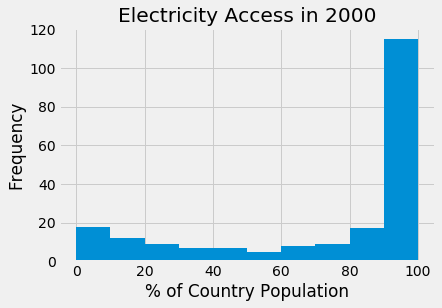

In [11]:
# Plotting a histogram of electricity access in 2000
plt.hist(access["2000"].dropna())
plt.title("Electricity Access in 2000")
plt.ylabel("Frequency")
plt.xlabel("% of Country Population")
plt.show()

**Question 3.1:** It may be more informative if we graphed the 2000 data per region. Let's create 6 subplots for the 6 regions. (Omitting Latin America & Carribbean due to lack of data). Since all the subplots are graphed in the same way, use a for loop. Do not copy and paste your code six times.<br><br>
The regions are: "East Asia & Pacific", "Europe & Central Asia", "Middle East & North Africa", "North America", "South Asia", "Sub-Saharan Africa". <br><br>We have provided these in the form of a list with the variable name of 'regions'. Think about how you can use this 'regions' list in your code within the for loop. Make sure to add titles and labels for both axes.

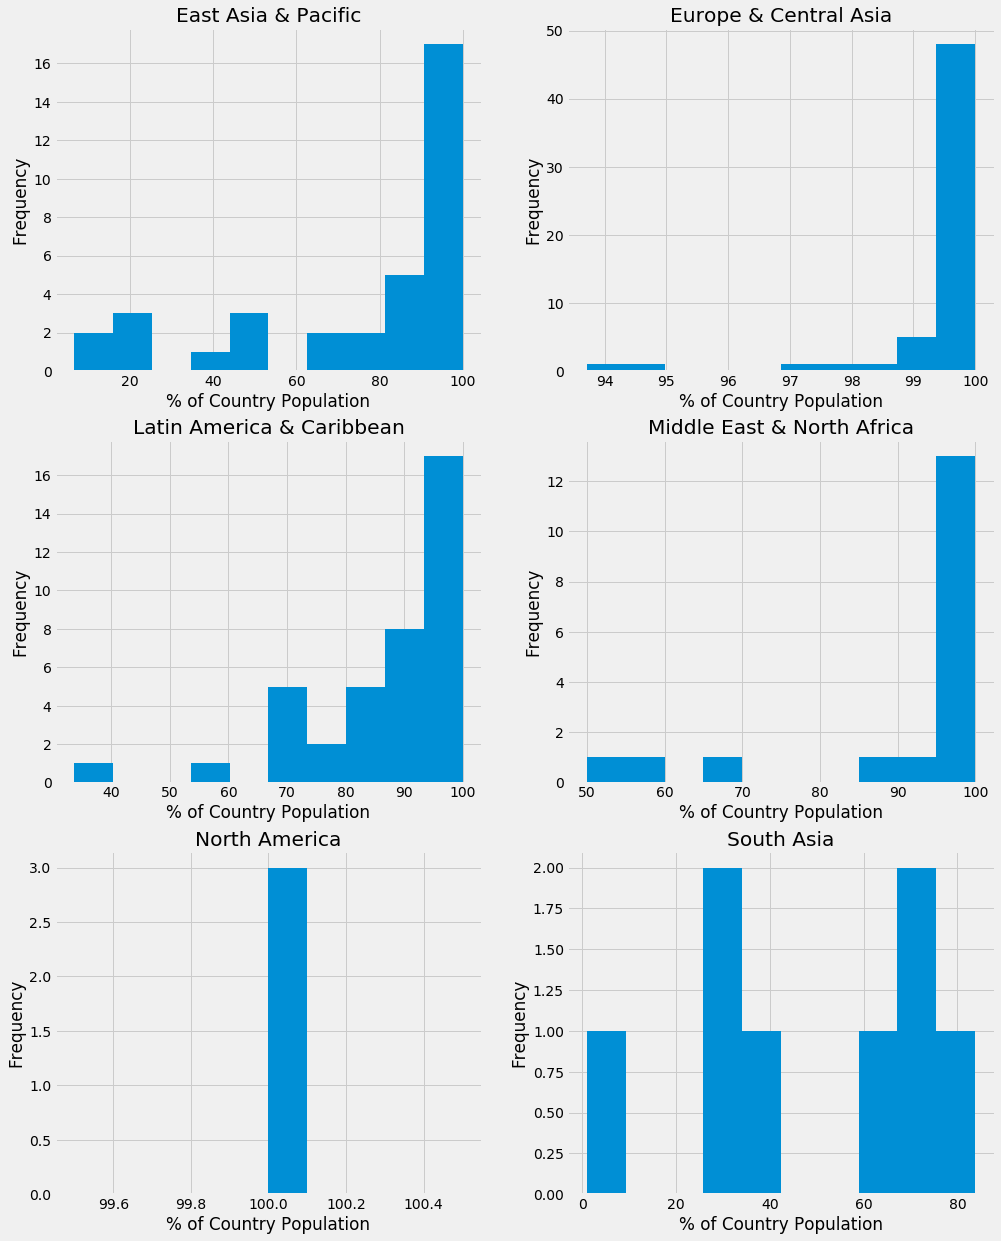

In [12]:
# SOLUTION
plt.figure(figsize=(15, 20))
regions = np.unique(access['Region'].values)
for i in range(6):
    plt.subplot(3, 2, i+1)

    plt.hist(access.loc[access["Region"] == regions[i], "2000"].dropna())
    plt.title(regions[i])
    plt.xlabel("% of Country Population")
    plt.ylabel("Frequency")

plt.show()

**Question 3.2a:** What can you observe from the histograms?

<u>General comment</u>: for questions like 3.2a-c, we expect you to answer them in a manner that shows some degree of thoughtfulness. For example 3.2a: one-sentence answers that explain what the histograms are generally meant to convey without any critical thinking will not get you credit.

Below are some examples of points we looked for (but detailed in paragraph form):

Potential answers:
- wide variance in distribution of electricity access
- y-scale not uniform
- potential effects of the # of included countries per region on distributions

** Question 3.2b:** Are there any interesting patterns seen in each region?

Potential answers: 
- should contain some observation on patterns of access across regions (e.g., how regions with similar levels of access may be related with one anotehr)
- e.g., trimodal distribution in south asia, and to some extent, the Middle East/North Africa

**Question 3.2c:** What is a possible explanation for the difference in distribution seen in the 6 regions?

Potential answer: 
- discussion on how social, economic, or political factors (e.g. varying levels of development) may have an effect on access. An answer that simply says 'income' or 'GDP' without an explanation will not get you full credit. 

### Seaborn and KDEs
**Seaborn** is a Python data visualization library that is built on top of matplotlib. It offers a higher level of abstraction, and arguably more attractive-looking graphics. Below is a histogram plotted using seaborn. Because of its higher level of abstraction, seaborn can plot elements on a graph that would usually require extra calculation using our usual libraries (e.g., a linear regression line; or the kernel density estimation curve overlayed on the top of this histogram). A great option for plotting a univariate distribution of observations is seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html), which combines matplotlib histogram with seaborn kde and rugplot. 

Note that the KDE plot normalizes the data so that it is between 0 and 1. It also represents the distribution of a set of data, with [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother).

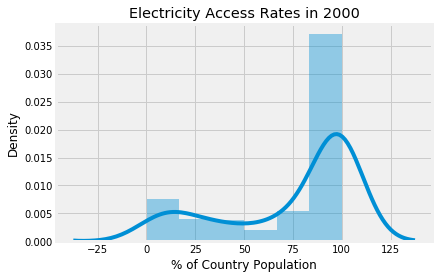

In [12]:
# Run this example seaborn plot
sns.distplot(access["2000"].dropna())
plt.title("Electricity Access Rates in 2000")
plt.xlabel("% of Country Population")
plt.ylabel("Density")
plt.show()

**Question 3.3:** Use sns.distplot() to plot only the KDEs of the global access rates in 1990, 2000, and 2014 on top of each other (no need to separate by region). 

Make sure to include a legend. Consult the [documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) and include a title. Make sure to label the two axes.<br>

Hint: You will need to use sns.distplot(label="...") for your legend to show up properly. Also, by default, some of the curves may be cut off. Use plt.ylim() to adjust the limits on the y-scale so that this doesn't happen.

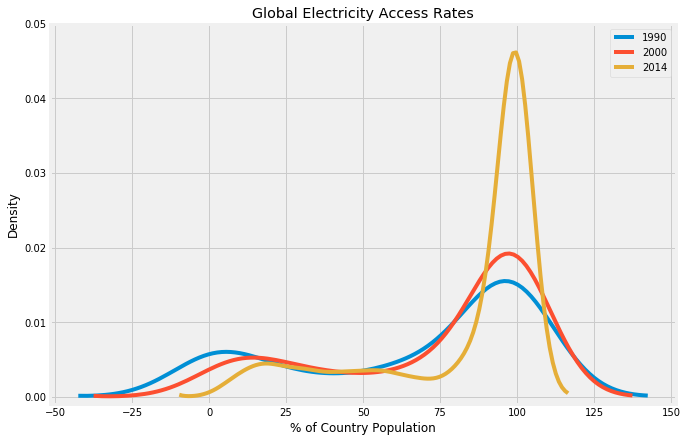

In [14]:
# SOLUTION
plt.figure(figsize=(10, 7))
sns.distplot(access["1990"], hist=False, kde=True, label="1990")
sns.distplot(access["2000"], hist=False, kde=True, label="2000")
sns.distplot(access["2014"], hist=False, kde=True, label="2014")
plt.ylim(-0.001, 0.05)
plt.legend()
plt.title("Global Electricity Access Rates")
plt.xlabel("% of Country Population")
plt.ylabel("Density")
plt.show()

**Question 3.4**: What do you observe about the distributions for the different years? Does this visualization make sense? Why or why not?

Answer: ...

In [ ]:
# POSSIBLE SOLUTION
# The distribution shifts to the right as time passes by. This makes sense because as time passes by, 
# more of the population should have access to electricity.
# Note how KDE results in values below 0 and above 100, which don't make sense.

**Question 3.5:** Why would it be advantageous to only plot the KDE instead of the histogram?

Answer: ...

In [ ]:
# POSSIBLE SOLUTION
# With KDEs, you can overlay multiple curves on top of one another, which makes it easier to compare distributions of
# different sets of data.

### Box Plots and Violin Plots

**Question 3.6:** Back to matplotlib! Using the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for plt.boxplot(), plot the electricity consumption rates for each region in 2000, side by side. <br><br>
Note: We are now using the "consumption" dataframe. We have provided skeleton code to faciliate the plotting of side-by-side boxplots. Your mission is to append arrays of data from the year 2000 for each of the 6 regions onto the list "data_to_plot". Make sure to remove any rows containing NaN values and label titles and axes.<br>

Hint: Remember how we plotted the electricity access histogram subplots for the different regions.

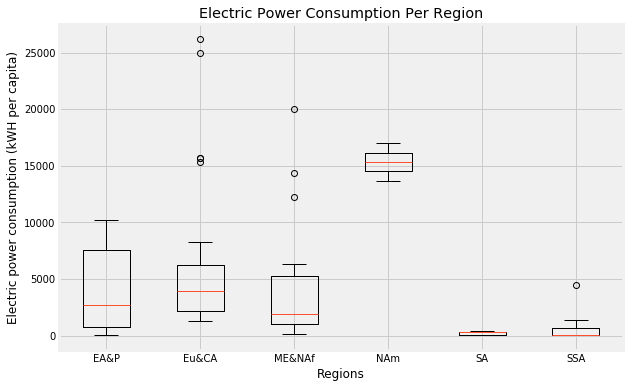

In [15]:
# POSSIBLE SOLUTION
consumption = consumption.dropna()
regions = ["East Asia & Pacific", "Europe & Central Asia", "Middle East & North Africa", "North America", "South Asia", "Sub-Saharan Africa"]
data_to_plot = list()
for i in range(6):
    data_to_plot.append(np.array(consumption.loc[consumption["Region"] == regions[i], "2000"]))
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_xticklabels(["EA&P", "Eu&CA", "ME&NAf", "NAm", "SA", "SSA"])
plt.xlabel("Regions")
plt.ylabel("Electric power consumption (kWH per capita)")
plt.title("Electric Power Consumption Per Region")
plt.show()

<br>
**Question 3.7:** Now, using the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html) for plt.violinplot(), plot the total energy consumption rates for each region, side by side. <br>

Note: Use the "total" dataframe. Make sure to remove any rows containing NaN values and label titles and axes. Reference the skeleton code used to plot the boxplots above.

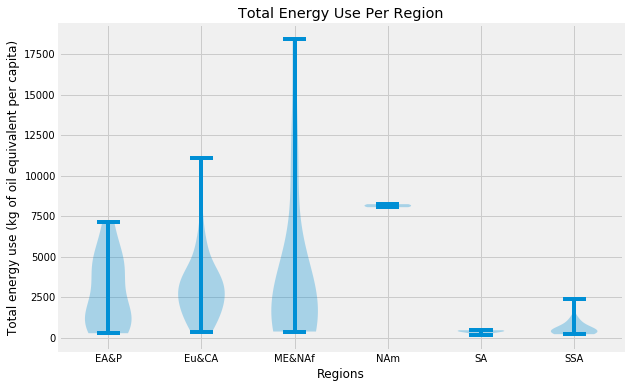

In [16]:
# POSSIBLE SOLUTION
total = total.dropna()
regions = ["East Asia & Pacific", "Europe & Central Asia", "Middle East & North Africa", "North America", "South Asia", "Sub-Saharan Africa"]
data_to_plot = list()
for i in range(6):
    data_to_plot.append(np.array(total.loc[total["Region"] == regions[i], "2000"]))
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.violinplot(data_to_plot)
ax.set_xticklabels(["", "EA&P", "Eu&CA", "ME&NAf", "NAm", "SA", "SSA"])
plt.xlabel("Regions")
plt.ylabel("Total energy use (kg of oil equivalent per capita)")
plt.title("Total Energy Use Per Region")
plt.show()

**Question 3.8**: The above two plots allow you to compare the distributions of electricity consumption and energy consumption rates. What are the similarities and/or differences between the two distributions? What factors can you think of that could possibly account for this similarity/difference?

Answer: 
- Most important: comment on how electricity is a subset of energy (i.e. there are other sources of energy countries may be relying on, like oil). Explanation on how this maps onto the countries/regions above. We particularly appreciated any stabs at why there may be similarities/differences between the two. 
- Observation concerning difference in outliers between EU&CA, ME&NAf in the two plots
- BP: shows median, IQR, outliers
- VP: provides information on probability density
- Both: show range of values, distribution

**Question 3.9**: Compare and contrast the four different types of plots above, discussing the pros and cons of each of them. What can see in one type of plot that you can't see in the others? In what situations would use you use one type of plot over another?

Example answers: 
- Histogram: easy to see skewness, though perhaps not as easily as a KDE. 
- KDE: great way to get an understanding of probability density at a glance, but can be skewed by outliers, and can look very different depending on parameters
- Box Plot: easy to see median/IQR/outliers, but information is lost within boxplot, etc.
- Violin Plot: great combination of box/prob dens, but skewed by outliers

<br>

---

## Section 4: Scatter Plots<a id='section 3'></a>

In this section, we will compare how electricity access and consumption rates grew over time (from 1990 to 2014) using scatter plots.

**Question 4.1:** Create a scatter plot of for Angola, with the electricity access rate on the x-axis and the electricity consumption rate on the y-axis. Make sure to label the title and axes. You can find the documentation for plt.scatter() [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). 

Hint: use .columns.get_iloc(-column name-) to get the index range for years 1990-2014.

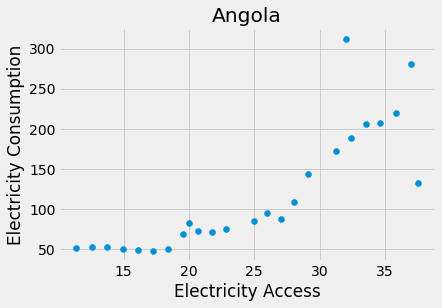

In [13]:
# POSSIBLE SOLUTION
plt.scatter(np.array(access[access['Country Name'] == 'Angola'].iloc[:,34:59]), 
            np.array(consumption[consumption['Country Name'] == 'Angola'].iloc[:,4:29]))
plt.title("Angola")
plt.xlabel("Electricity Access")
plt.ylabel("Electricity Consumption")
plt.show()

<br>**Question 4.2:** Now, plot the average electricity consumption (y-axis) vs. the average electricity access (x-axis) from 1990 to 2014 *for each region*. We recommend making two temporary dataframes, 'region_access' and 'region_consumption', to isolate the data for each region being worked on. Make sure to label titles, axes, and include a legend.

In [ ]:
# POSSIBLE SOLUTION
regions = ["East Asia & Pacific", "Europe & Central Asia", "Middle East & North Africa", "North America", "South Asia", "Sub-Saharan Africa"]
plt.figure(figsize=(10, 7))
for i in range(6):
    region_access = access.loc[access["Region"] == regions[i], :]
    region_consumption = consumption.loc[consumption["Region"] == regions[i], :]
    region_access.head()
    plt.scatter(np.array(region_access.iloc[:,34:59].mean()), np.array(region_consumption.iloc[:, 4:29].mean()), label=regions[i])
plt.title("Average Electricity Consumption vs. Average Electricity Access")
plt.xlabel("Average Electricty Access (% of population)")
plt.ylabel("Average Electricity Consumption (kWh per capita)")
plt.legend()
plt.show()

<br>
**Question 4.3:** What is the relationship between electricity access and consumption? Is it reasonable to assume that there is causality between access and consumption? What other factors can be influencing consumption?

Answer (below are some key points):
- some regions appear to exhibit a linear correlative relationship, but we cannot assume causality
- factors that may influence consumption: cultural differences between countries; emphasis on efficiency; etc.

----

## Submission

Congrats, you're done with homework 4!

In order to turn in this assignment, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file through bCourses.

----

## Bibilography
+ World Bank - Data. https://data.worldbank.org
+ Seaborn - Distplot. https://seaborn.pydata.org/generated/seaborn.distplot.html
+ Matplotlib. https://matplotlib.org
+ Knowledge Stockpile - Creating boxplots with Matplotlib. http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

<hr/>
Notebook developed by: Rebekah Tang

Data Science Modules: http://data.berkeley.edu/education/modules